In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [8]:
adv_pd= pd.read_csv('../../Data_Files/Supervise_learning/Advertisement_Linear.csv')

In [9]:
adv_pd.shape

(200, 4)

In [11]:
adv_pd.head()

,TV,Radio,Newspaper,Sales
0,5186.850511,1425.592680,2901.164972,976.858645
1,1541.281083,1046.238882,1812.454095,1040.923968
2,6060.671343,3267.558356,2829.420647,973.925324
3,9618.627561,3985.852013,441.096274,1083.734988
4,2577.726481,3397.569141,1430.741962,803.827427


Text(0.5, 1.0, 'Sales vs TV')

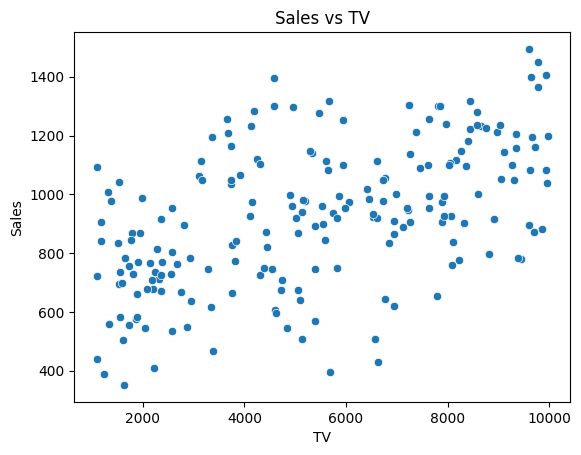

In [12]:
plt.Figure(figsize=(8,6))
sns.scatterplot(x='TV',y='Sales', data=adv_pd)
plt.title("Sales vs TV")

Text(0.5, 1.0, 'Sales vs Newspaper')

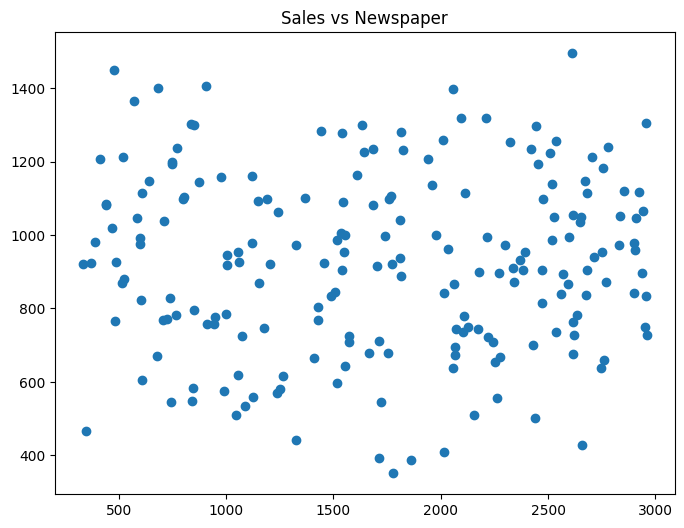

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(data=adv_pd, x='Newspaper',y='Sales')
plt.title("Sales vs Newspaper")

Text(0.5, 1.0, 'Sales vs Radio')

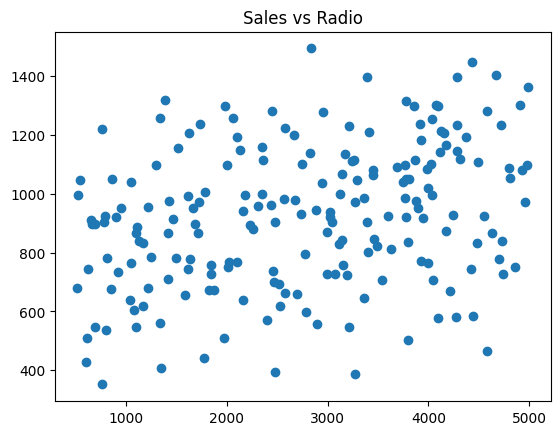

In [14]:
plt.Figure(figsize=(8,6))
plt.scatter(data=adv_pd, x='Radio',y='Sales')
plt.title("Sales vs Radio")

# Developing the Models - Linear Regression

## Linear Regression use OLS model - Ordinary Least Square Regression 

### 1. Simple Linear Regression

### Sales vs TV Relations

statsmodles.formula.api as smf - these library provide ols model to develop model

In [15]:
# statsmodel provide capabilities to define the model as formula - Sales ~ TV
# Create a models that can map the relationship between Sales(dependent variable) and TV(indepenedent variable)
# y ~ x -> Simple Linear Regression
# Sale(y) = mX + c (X - TV independent variable)

sm_sales_tv_model= smf.ols(formula='Sales ~ TV', data=adv_pd).fit()

In [16]:
# Observe the Summaryof the model
print(sm_sales_tv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.21
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.06e-15
Time:                        14:21:09   Log-Likelihood:                -1348.7
No. Observations:                 200   AIC:                             2701.
Df Residuals:                     198   BIC:                             2708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    665.9025     32.854     20.269      0.0

Sales (y) = mX + c (X - TV independent variable)
1. Here based on above result if we want to calculate the actual sales we can calculate as below
2. Sales = 0.0476(slope) * TV + 665.9025 (y-Intercept)

In [17]:
sm_sales_newspaper= smf.ols(formula='Sales  ~ Newspaper', data=adv_pd).fit()

Here i must apply .fit() method to convert the algorithm into an models

In [18]:
print(sm_sales_newspaper.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02072
Date:                Mon, 15 Sep 2025   Prob (F-statistic):              0.886
Time:                        14:21:15   Log-Likelihood:                -1381.3
No. Observations:                 200   AIC:                             2767.
Df Residuals:                     198   BIC:                             2773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    917.3905     41.780     21.958      0.0

### Sales vs Radio plot

In [19]:
sm_sales_radio= smf.ols(formula='Sales ~ Radio', data=adv_pd).fit()
print(sm_sales_radio.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           7.75e-06
Time:                        14:21:19   Log-Likelihood:                -1371.1
No. Observations:                 200   AIC:                             2746.
Df Residuals:                     198   BIC:                             2753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    760.4142     38.954     19.521      0.0

In [20]:
y_pred_radio= sm_sales_radio.predict(adv_pd)

### Multiple-Linear Regression - Sales vs TV and Radio

In [58]:
sm_sales_tv_radio_model= smf.ols(formula='Sales ~ TV + Radio', data=adv_pd).fit()
# sales = 0.0452 * TV + 0.0486* Radio + 544.7789

In [22]:
print(sm_sales_tv_radio_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     51.46
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.04e-18
Time:                        14:21:27   Log-Likelihood:                -1339.2
No. Observations:                 200   AIC:                             2684.
Df Residuals:                     197   BIC:                             2694.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    544.7789     41.670     13.074      0.0

### Sales ~ TV + Radio + Newspaper

In [23]:
sm_sales_tv_radio_newspaper_model= smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=adv_pd).fit()

In [24]:
print(sm_sales_tv_radio_newspaper_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     34.60
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           5.42e-18
Time:                        14:21:32   Log-Likelihood:                -1338.8
No. Observations:                 200   AIC:                             2686.
Df Residuals:                     196   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    511.7636     54.066      9.466      0.0

### predicting the next values

In [25]:
y_pred_tv= sm_sales_tv_model.predict(adv_pd)

In [52]:
# Actual Sales data
adv_pd['Sales'].head()

0     976.858645
1    1040.923968
2     973.925324
3    1083.734988
4     803.827427
Name: Sales, dtype: float64

In [53]:
# predicted Sales Values
y_pred_tv[0:5]

0     912.969593
1     739.318909
2     954.592607
3    1124.069981
4     788.688275
dtype: float64

In [27]:
y_pred_tv_redio= sm_sales_tv_radio_model.predict(adv_pd)
y_pred_tv_redio[0:5]

0     848.263499
1     665.218782
2     977.237193
3    1172.798115
4     826.290175
dtype: float64

In [28]:
y_pred_tv_redio_news=sm_sales_tv_radio_newspaper_model.predict(adv_pd)
y_pred_tv_redio_news[0:5]

0     867.609144
1     664.653080
2     996.888627
3    1152.467628
4     821.080602
dtype: float64

### Sales vs TV Spends - Based on predicted model- if want to draw a best fit line

In [29]:
y_tv=sm_sales_tv_model.predict(adv_pd)

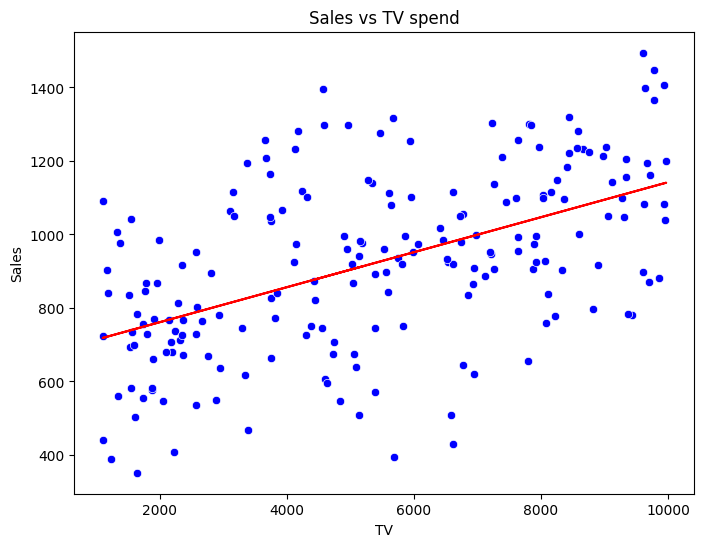

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=adv_pd, x='TV',y='Sales', color='blue')
plt.plot(adv_pd['TV'],y_tv, color='red')
plt.title('Sales vs TV spend')
plt.show()

### Sales vs Radio Plot

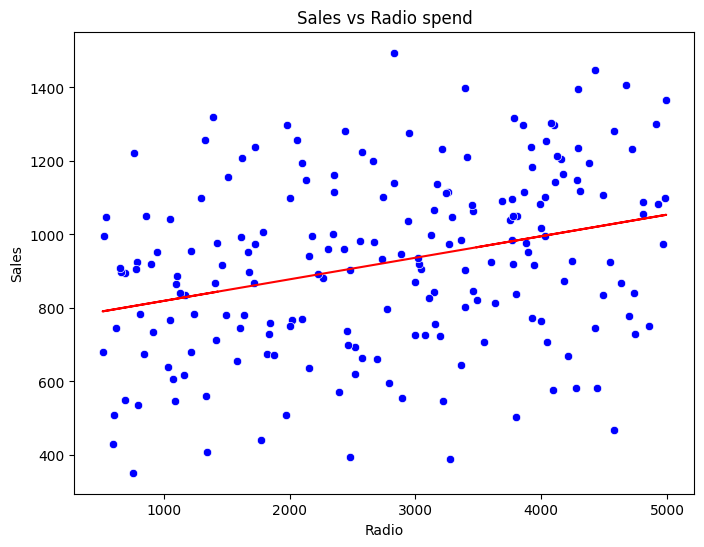

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=adv_pd, x='Radio',y='Sales', color='blue')
plt.plot(adv_pd['Radio'],y_pred_radio, color='red')
plt.title('Sales vs Radio spend')
plt.show()

### Sales vs TV and Newspaper

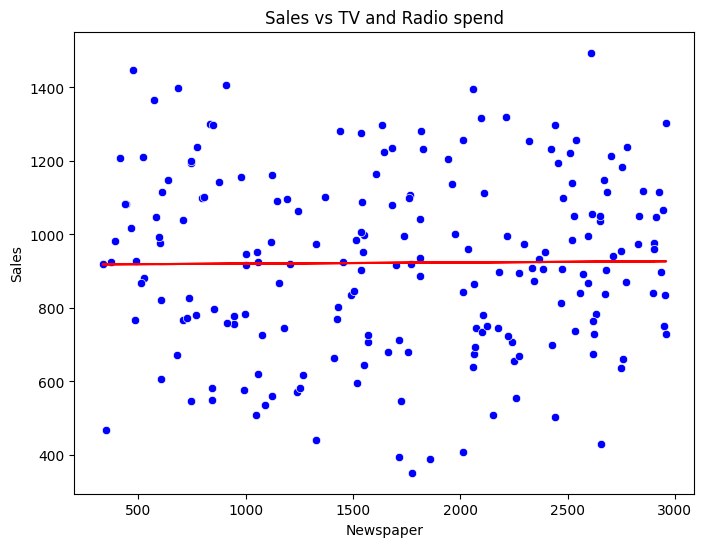

In [32]:
y_pred_newspaper= sm_sales_newspaper.predict(adv_pd)
plt.figure(figsize=(8,6))
sns.scatterplot(data=adv_pd, x='Newspaper',y='Sales', color='blue')
plt.plot(adv_pd['Newspaper'],y_pred_newspaper, color='red')
plt.title('Sales vs TV and Radio spend')
plt.show()

### above we can see, their is no increase in Sales with spending on Newspaper

### Ploting Sales vs TV and Radio - 3DS plot using mpl.toolkits.mplot3d - Axes3D

In [33]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20412\1443233094.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


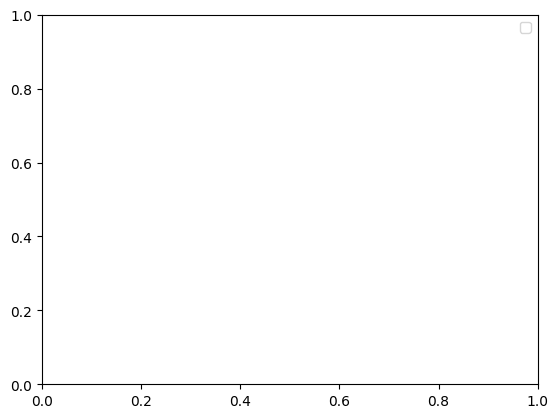

In [34]:
# Actual Data
x_tv= adv_pd['TV']
x_Radio= adv_pd['Radio']
y_Sales= adv_pd['Sales']

# predicted sales from TV and Radio using OLS models

y_pred= y_pred_tv_redio

## 3DS Scatter plot with regression plane
fig= plt.Figure(figsize=(10,7))
ax= fig.add_subplot(111, projection='3d')

## Scatter Actual points
ax.scatter(x_tv, x_Radio, y_Sales, color='blue', alpha=0.5,label='Actual Sales')

# Create a meshgrid for TV & Radio
tv_range = np.linspace(x_tv.min(), x_tv.max(), 50)
radio_range = np.linspace(x_Radio.min(), x_Radio.max(), 50)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Predict on grid for regression plane
grid_data = pd.DataFrame({'TV': tv_grid.ravel(), 'Radio': radio_grid.ravel()})
sales_grid = sm_sales_tv_radio_model.predict(grid_data).values.reshape(tv_grid.shape)

# Plot regression plane
ax.plot_surface(tv_grid, radio_grid, sales_grid, color='red', alpha=0.4)

# Labels
ax.set_xlabel("TV Advertising Spend")
ax.set_ylabel("Radio Advertising Spend")
ax.set_zlabel("Sales")
ax.set_title("Sales vs TV & Radio (with Regression Plane)")

plt.legend()
plt.show()

# Calculating Errors that model creating while predicting the values

Their are two main errors
1. Mean Absolute Error
2. Root Mean Square Error

### 1. Mean Squared Error 

### using scykit-learn - mean_squared_error

In [35]:
# error = Actual value - predicted value - can be negative/positive
# absolute error = |error| - removing sign
# sum of absolute error 
# Mean of Absolute Error = sum/total(absolute error)

In [41]:
from sklearn.metrics import mean_squared_error

In [50]:
# mean_squared_error(y_actual, y_pred)
print(f"Mean Sqaured Error : {mean_squared_error(y_pred=y_pred_tv_redio_news, y_true=adv_pd['Sales'])}")

Mean Sqaured Error : 38166.452846434346


Mean Sqaured Error : 38166.452846434346 - this is very big error

### 2. Root Mean Squared Error

In [51]:
from sklearn.metrics import root_mean_squared_error
print(f"Root Mean Squared Error : {root_mean_squared_error(y_pred=y_pred_tv_redio_news, y_true=adv_pd['Sales'])}")

Root Mean Squared Error : 195.3623629219158


Root Mean Squared Error : 195.3623629219158 - big error

### 3. Mean Absolute Error

In [54]:
from sklearn.metrics import mean_absolute_error

In [57]:
print(f"Mean Absolute error : {mean_absolute_error(y_true=adv_pd['Sales'],y_pred=y_pred_tv_redio_news)}")

Mean Absolute error : 155.36693173514738
